pregunta 1

#1.a

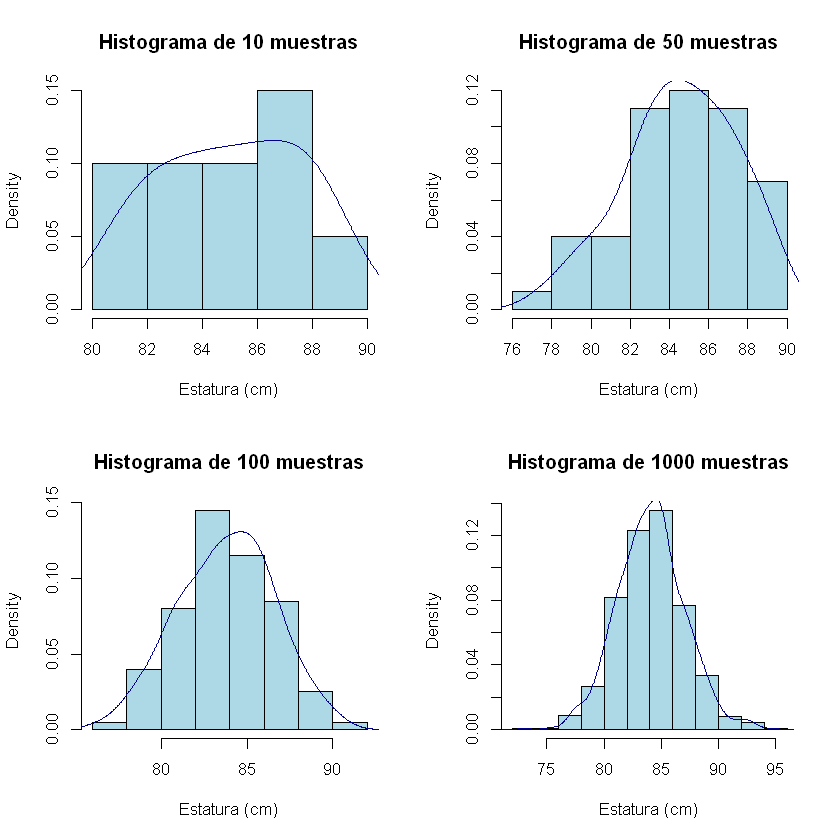

In [1]:
media <- 84
desviacion <- 2.96

# Tamaños de muestra
tamaños <- c(10, 50, 100, 1000)

# Generación de muestras y creación de histogramas
par(mfrow = c(2, 2)) # Configuración para mostrar 4 gráficos en una ventana

for (n in tamaños) {
  muestra <- rnorm(n, mean = media, sd = desviacion)
  hist(muestra, main = paste("Histograma de", n, "muestras"),
       xlab = "Estatura (cm)", col = "lightblue", border = "black",
       probability = TRUE)
  lines(density(muestra), col = "darkblue") # Agrega la densidad de la muestra
}


#1.b

In [2]:
# Calcular promedio y desviación estándar para cada muestra
for (n in tamaños) {
  muestra <- rnorm(n, mean = media, sd = desviacion)
  promedio <- mean(muestra)
  desviacion_est <- sd(muestra)
  cat("Para", n, "muestras: Promedio =", promedio, ", Desviación estándar =", desviacion_est, "\n")
}


Para 10 muestras: Promedio = 85.37513 , Desviación estándar = 2.938129 
Para 50 muestras: Promedio = 83.8891 , Desviación estándar = 3.224835 
Para 100 muestras: Promedio = 83.79746 , Desviación estándar = 2.879608 
Para 1000 muestras: Promedio = 83.83931 , Desviación estándar = 3.006868 


pregunta 2

#2.a

In [3]:
# Parámetros para el experimento de Bernoulli
lanzamientos <- 10
probabilidad_cara <- 0.5

# Simulación de 10 lanzamientos
resultado <- rbinom(1, size = lanzamientos, prob = probabilidad_cara)
cat("Cantidad de caras en 10 lanzamientos:", resultado, "\n")


Cantidad de caras en 10 lanzamientos: 6 


#2.b

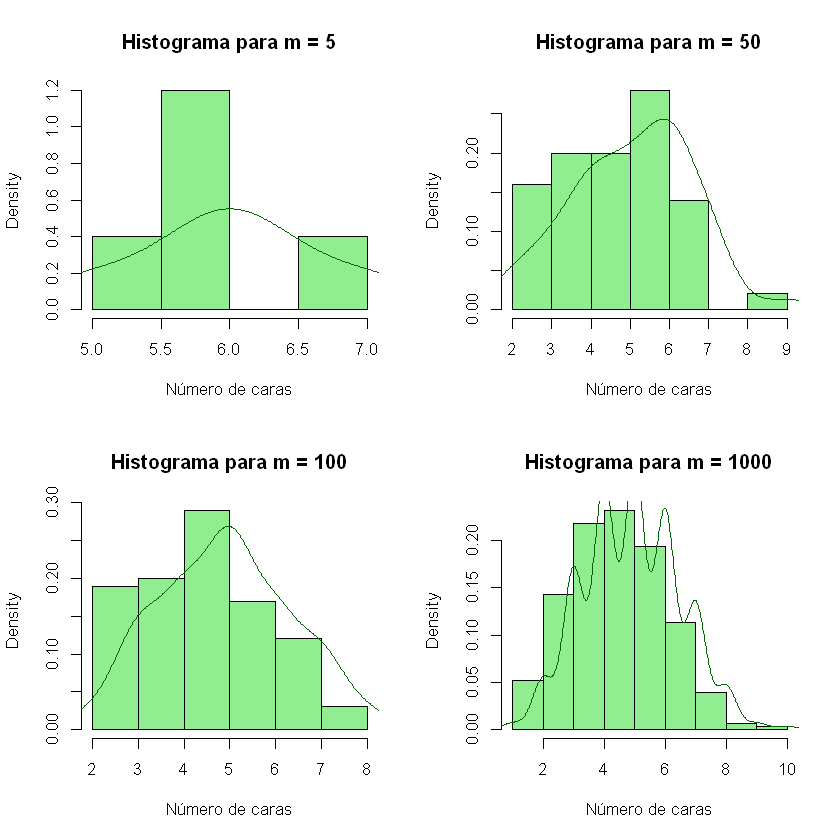

In [4]:
# Valores de m
repeticiones <- c(5, 50, 100, 1000)

# Crear histogramas para cada repetición
par(mfrow = c(2, 2)) # Configuración para mostrar 4 gráficos en una ventana

for (m in repeticiones) {
  resultados <- rbinom(m, size = lanzamientos, prob = probabilidad_cara)
  hist(resultados, main = paste("Histograma para m =", m),
       xlab = "Número de caras", col = "lightgreen", border = "black",
       probability = TRUE)
  lines(density(resultados), col = "darkgreen") # Agrega la densidad
}


#2.c

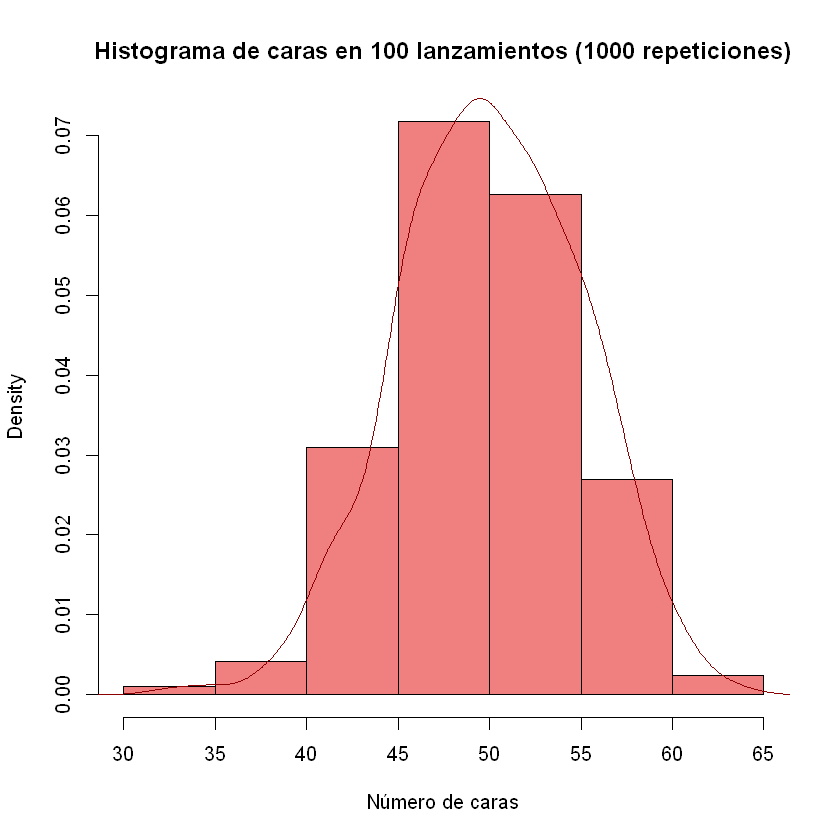

In [5]:
# Parámetros para 100 lanzamientos y 1000 repeticiones
n_lanzamientos <- 100
repeticiones_binomial <- 1000

# Simulación y creación del histograma
resultados_100 <- rbinom(repeticiones_binomial, size = n_lanzamientos, prob = probabilidad_cara)
hist(resultados_100, main = "Histograma de caras en 100 lanzamientos (1000 repeticiones)",
     xlab = "Número de caras", col = "lightcoral", border = "black",
     probability = TRUE)
lines(density(resultados_100), col = "darkred")


#2.d


In [6]:
# Cálculo de la probabilidad P(X <= 50) en el caso de 100 lanzamientos.
probabilidad <- pbinom(50, size = n_lanzamientos, prob = probabilidad_cara)
cat("P(X <= 50):", probabilidad, "\n")


P(X <= 50): 0.5397946 


#2.e

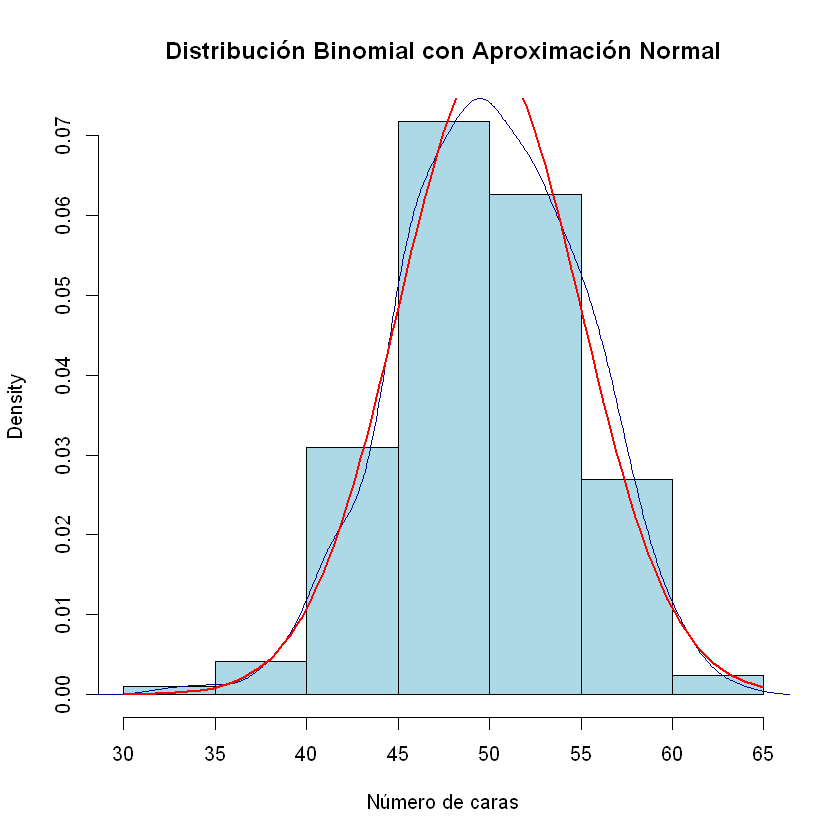

In [7]:
# Parámetros de la distribución normal
media_normal <- n_lanzamientos * probabilidad_cara
desviacion_normal <- sqrt(n_lanzamientos * probabilidad_cara * (1 - probabilidad_cara))

# Histograma de la distribución binomial
hist(resultados_100, main = "Distribución Binomial con Aproximación Normal",
     xlab = "Número de caras", col = "lightblue", border = "black", probability = TRUE)
lines(density(resultados_100), col = "darkblue")

# Superposición de la distribución normal
curve(dnorm(x, mean = media_normal, sd = desviacion_normal), 
      col = "red", lwd = 2, add = TRUE)


#2.f

In [8]:
# Cálculo de P(X <= 50) para la distribución normal con corrección de continuidad
probabilidad_normal_yates <- pnorm(50.5, mean = media_normal, sd = desviacion_normal)
cat("P(X <= 50.5) (con corrección de continuidad):", probabilidad_normal_yates, "\n")

# Comparación con el valor de la binomial original
cat("Comparación con P(X <= 50) (distribución binomial):", probabilidad, "\n")


P(X <= 50.5) (con corrección de continuidad): 0.5398278 
Comparación con P(X <= 50) (distribución binomial): 0.5397946 


#pregunta 3

#3.1

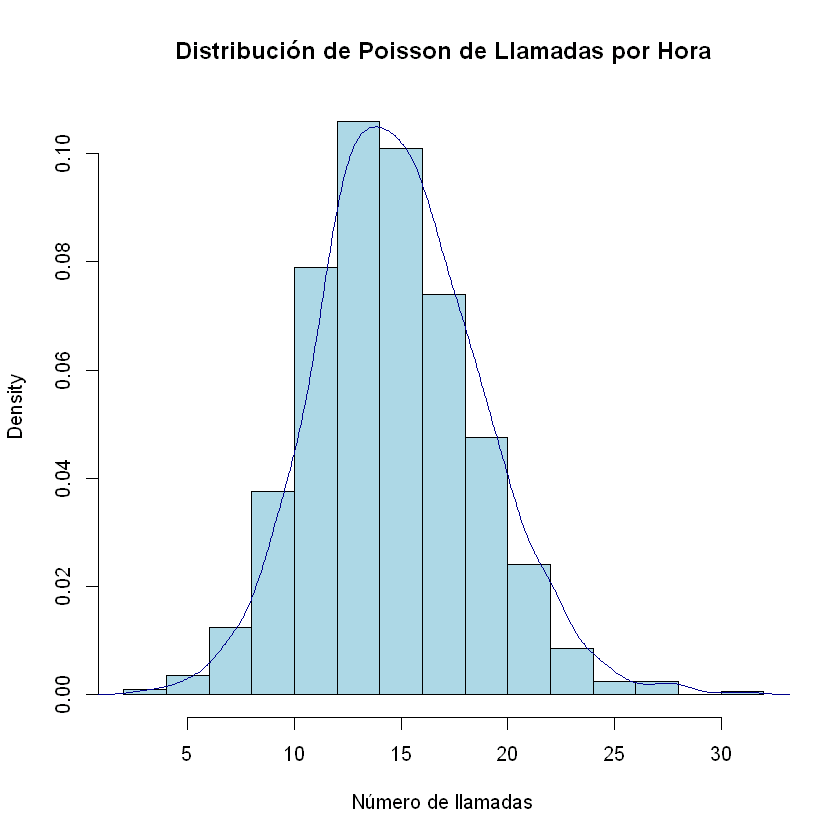

In [9]:
# Parametro de la distribucion de Poisson
lambda <- 15

# Generacion de 1000 valores de la distribucion de Poisson
llamadas <- rpois(1000, lambda = lambda)

# Histograma de la distribución de Poisson
hist(llamadas, main = "Distribución de Poisson de Llamadas por Hora",
     xlab = "Número de llamadas", col = "lightblue", border = "black",
     probability = TRUE)
lines(density(llamadas), col = "darkblue")


#3.2

Para aproximar la distribucion de Poisson con una normal, usamos la media y desviacion estandar de la Poisson μ=λ y σ = √λ

In [10]:
# Calculo exacto de P(X >= 17) para la distribucion de Poisson
prob_exacta <- 1 - ppois(16, lambda = lambda)
cat("P(X >= 17) (exacto):", prob_exacta, "\n")

# Parametros de la distribucion normal aproximada
media_normal <- lambda
desviacion_normal <- sqrt(lambda)

# Calculo de P(X >= 17) con la distribucion normal (correccion de continuidad)
prob_aprox <- 1 - pnorm(16.5, mean = media_normal, sd = desviacion_normal)
cat("P(X >= 17) (aproximacion normal con correccion):", prob_aprox, "\n")


P(X >= 17) (exacto): 0.3358768 
P(X >= 17) (aproximacion normal con correccion): 0.3492677 


#3.3

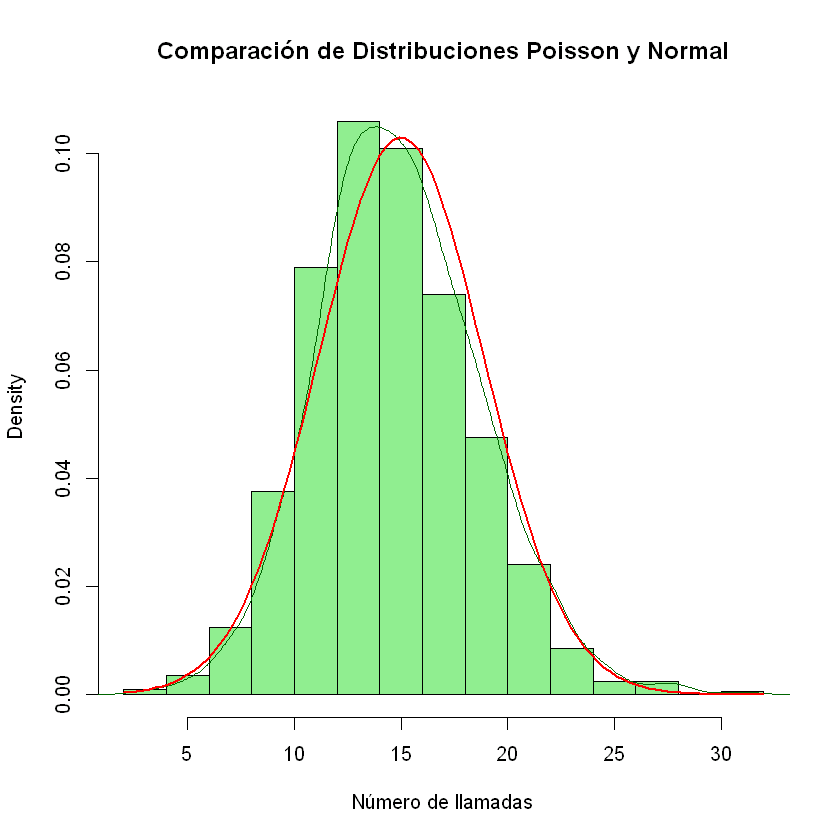

In [11]:
# Histograma de la distribución de Poisson
hist(llamadas, main = "Comparación de Distribuciones Poisson y Normal",
     xlab = "Número de llamadas", col = "lightgreen", border = "black",
     probability = TRUE)
lines(density(llamadas), col = "darkgreen")

# Superposición de la distribución normal
curve(dnorm(x, mean = media_normal, sd = desviacion_normal), 
      col = "red", lwd = 2, add = TRUE)


#pregunta 4

#4.1

La distribucion geometrica modela el numero de intentos hasta obtener el primer exito en experimentos de Bernoulli repetidos. 
La probabilidad de que el primer exito ocurra en el intento X=k es:P(X=k)=(1-p)^* p

donde:
p es la probabilidad de exito en cada intento,
k es el numero de intentos hasta el primer exito.

#4.2

La distribucion geometrica representa fenomenos como el numero de intentos necesarios para obtener una cara en el lanzamiento de una moneda (p=0.5), o el numero de llamadas necesarias hasta que un cliente conteste (con probabilidad p de exito en cada llamada).

#4.3

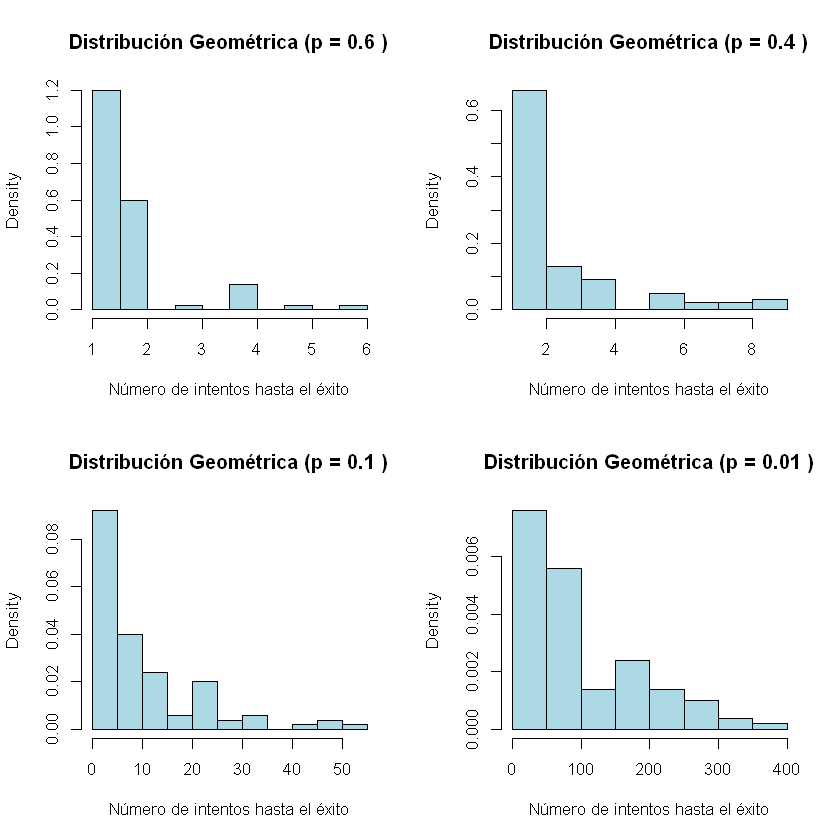

In [12]:
# Valores de probabilidad de éxito
probabilidades <- c(0.6, 0.4, 0.1, 0.01)

# Configuración para mostrar 4 gráficos en una ventana
par(mfrow = c(2, 2))

# Generación y graficación para cada valor de p
for (p in probabilidades) {
  # Generar 100 valores con distribución geométrica
  valores_geom <- rgeom(100, prob = p) + 1  # rgeom cuenta desde 0, sumamos 1 para contar intentos

  # Histograma
  hist(valores_geom, main = paste("Distribución Geométrica (p =", p, ")"),
       xlab = "Número de intentos hasta el éxito", col = "lightblue", border = "black",
       probability = TRUE)
}
